### 어제 내용
- 머신러닝 : 기계가 스스로 학습하여 데이터의 패턴과 규칙을 찾아 예측하고 판단하는 것
- 머신러닝 종류 : 지도학습, 비지도학습, 강화학습
- 지도학습 : 문제 데이터와 답 데이터(label)을 가지고 학습
    - 회귀 : 연속적인 숫자에 대해서 예측
    - 분류 : 여러 클래스 레이블 중에 하나를 판단
- 머신러닝 과정
    - 1. 문제정의(목적) : 주제, 어떤 모델 사용, 분류vs회귀 등
    - 2. 데이터 수집 : 크롤링, csv등 공공 포털 사이트 다운, db, 센서, 설문조사
    - 3. 데이터 전처리 : 결측치 처리, 이상치 처리, 특성(각 컬러)공학
    - 4. 탐색적 데이터 분석(eda) : 평균 분산 등 기술통계(기술하다의 기술), 변수간 상관관계(변수는 윗줄의 특성과 같은말)
    - 5. 머신러닝 모델 정의 : 모델 생성, 하이퍼 파라미터 지정
    - 6. 모델 학습 : fit
    - 7. 모델 평가와 예측 : accuracy_score, 모델.score(), predict

### 목표
- 문제정의
  500명의 키, 몸무게, 비만도 라벨을 이용하여 비만을 판단하는 모델을 만들어보자.

환경세팅

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# 머신러닝 도구
# sklearn : scikit - learn
from sklearn.neighbors import KNeighborsClassifier # 분류 모델
from sklearn.metrics import accuracy_score # 정확도 측정 도구

데이터 불러오기

In [2]:
# data 변수에 담아주기
# 인덱스 값 = 'Label' 로 설정해서 불러오기
# index_col = '컬럼'
data = pd.read_csv('./data/bmi_500.csv', index_col='Label')
data

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


In [3]:
# 데이터 정보 확인하기
# 전체 행, 열 정보확인
# 결측치 확인
# 각 컬럼의 데이터 타입 확인

data.info()
# object 문자열
# int64 정수

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


데이터 전처리 : pass

탐색적 데이터 분석
- 기술통계 확인
- 시각화해서 Label분포 현황 확인

In [4]:
# data 기준으로 기술통계 보기
data.describe()
# gender가 없어졌네? 숫자가 아니라서!

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [5]:
# 시각화 하기 전에 Label 컬럼 중복없이 값 확인
data.index.unique().size

6

In [6]:
data.index.unique()

# Extreme Obesity 고도비만
# Obesity 비만
# Overweight 과체중
# Normal 정상
# Weak 저체중
# Extremely Weak 극심한 저체중

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

In [7]:
# 각각의 클래스의 값은 몇개씩 들어있을까?
data.index.value_counts()

Extreme Obesity    198
Obesity            130
Normal              69
Overweight          68
Weak                22
Extremely Weak      13
Name: Label, dtype: int64

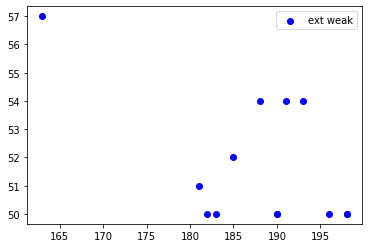

In [8]:
# bmi 레이블별 분포 시각화
# 1. Extremely Weak 산점도 시각화
d = data.loc['Extremely Weak']# 행 인덱싱
plt.scatter(d['Height'], d['Weight'], c='blue', label='ext weak')
plt.legend() # 범례 표시
plt.show() # 그래프 출력

# Label 컬럼에 있을 때 특정 레이블 값에 접근하는 방법
# 불리언 이용
# data[data['Label'] == 'Extremely Weak']

In [9]:
# 시각화 코드 집합 => 함수로 정의
def bmi_draw(label, color):
    d = data.loc[label]# 행 인덱싱
    plt.scatter(d['Height'], d['Weight'], c=color, label=label)

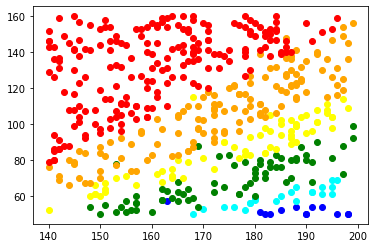

In [10]:
# Extreme Obesity 고도비만
# Obesity 비만
# Overweight 과체중
# Normal 정상
# Weak 저체중
# Extremely Weak 극심한 저체중

bmi_draw('Extremely Weak', 'blue')
bmi_draw('Weak', 'cyan')
bmi_draw('Normal', 'green')
bmi_draw('Overweight', 'yellow')
bmi_draw('Obesity', 'orange')
bmi_draw('Extreme Obesity', 'red')

# plt.legend()
plt.show()

데이터 분리
- 문제, 답 : X, y
- 훈련, 테스트 데이터 : train, test

In [11]:
data = pd.read_csv('data/bmi_500.csv')
data.head(3)

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity


In [12]:
# 대상['열'] , 여러 컬럼 인덱싱 -> 대상[['컬1', '컬2']]
# 대상.loc[행, 열]
# 대상.iloc[행, 열]
X = data[['Height', 'Weight']]    # 문제 컬럼 인덱싱 (2개: 키, 몸무게)
y = data['Label'] # 답 데이터 인덱싱 ()

# data.loc[:, ['Height','Weight']]
# data.loc[:, 'Height':'Weight']
# data.iloc[:, [1,2]]
# data.iloc[:, 1:3]


print(X.shape)
print(y.shape)

(500, 2)
(500,)


In [13]:
# 훈련셋
# 0 ~ 349 인덱싱
X_train = X[:350]
y_train = y[:350]


# 테스트셋
# 350 ~ 499
X_test = X[350:]
y_test = y[350:]

print('훈련용 문제:', X_train.shape)
print('훈련용 답:', y_train.shape)
print('테스트용 문제:', X_test.shape)
print('테스트용 답:', y_test.shape)

훈련용 문제: (350, 2)
훈련용 답: (350,)
테스트용 문제: (150, 2)
테스트용 답: (150,)


모델링
- 1. 모델 정의하고 하이퍼 파라미터 지정
- 2. 모델 학습
- 3. 모델 예측과 평가

In [14]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

pre = knn_model.predict(X_test)

In [15]:
knn_model.score(X_test, y_test)

0.9066666666666666

In [16]:
accuracy_score(y_test, pre)

0.9066666666666666

In [17]:
for i in range(1, 15):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)

    a = knn_model.score(X_test, y_test)

    print(i)
    print(a)
    

1
0.8933333333333333
2
0.8933333333333333
3
0.9
4
0.8933333333333333
5
0.9066666666666666
6
0.9133333333333333
7
0.9
8
0.9133333333333333
9
0.9133333333333333
10
0.94
11
0.8866666666666667
12
0.9133333333333333
13
0.9133333333333333
14
0.8866666666666667
